In [1]:
from platform import python_version
print(python_version())

3.9.12


In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style='white')
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [63]:
!pip install 'google-cloud-bigquery[pandas]'

In [3]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column, fontsize = 20)
    sns.distplot(df_skew[column])
    return

In [4]:
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.exceptions import NotFound

In [5]:
import os

In [6]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'ucl-dissertation-project-96ee7853ace6.json'

In [7]:
client = bigquery.Client()

sql_query = """
SELECT * FROM `ucl-dissertation-project.ucl_dissertation_dataset.user_summary_final`
"""

# job_config = bigquery.QueryJobConfig(destination="ucl-dissertation-project.ucl_dissertation_dataset.cdr_data_copy")
query_job = client.query(sql_query)

In [8]:
query_job.result()

In [9]:
result_df = query_job.to_dataframe()

In [10]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43984 entries, 0 to 43983
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       43984 non-null  Int64  
 1   number_of_phones              43984 non-null  Int64  
 2   data_usage                    43984 non-null  Int64  
 3   data_usage_duration           43984 non-null  Int64  
 4   outgoing_seconds              43921 non-null  Int64  
 5   outgoing_calls                43984 non-null  Int64  
 6   outgoing_sms                  43984 non-null  Int64  
 7   tenure                        43984 non-null  float64
 8   number_of_plans               43984 non-null  Int64  
 9   avg_validity                  43984 non-null  float64
 10  avg_voice_quantity            43984 non-null  float64
 11  avg_data_quantity             43984 non-null  float64
 12  avg_sms_quantity              43984 non-null  float64
 13  m

In [72]:
result_df

,user_id,number_of_phones,data_usage,data_usage_duration,outgoing_seconds,outgoing_calls,outgoing_sms,tenure,number_of_plans,avg_validity,...,amountBalanceInAccount,transaction_amount,average_data_usage,average_data_usage_duration,average_outgoing_seconds,average_outgoing_calls,average_outgoing_sms,Zone,gender,age
0,40842,1,6022413063,6556016,8406,197,6,12.93,1,0.0,...,NaN,NaN,0.4338,140.8442,0.1806,15.2359,0.4640,Others,Male,49
1,38810,1,10790350855,4078963,28999,512,7,13.53,1,0.0,...,NaN,NaN,0.7427,83.7432,0.5954,37.8418,0.5174,Others,Male,53
2,54316,1,22056077685,13698854,5959,38,9,5.10,1,0.0,...,NaN,NaN,4.0277,746.1249,0.3246,7.4510,1.7647,Others,Male,35
3,38076,1,21132671187,1722248,1093,18,9,5.93,1,0.0,...,NaN,NaN,3.3189,80.6749,0.0512,3.0354,1.5177,Others,Male,36
4,67891,1,0,0,0,7,17,4.03,1,0.0,...,NaN,NaN,0.0000,0.0000,0.0000,1.7370,4.2184,Others,Male,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43979,56559,1,16193933499,5865924,0,0,4,4.07,1,30.0,...,NaN,NaN,3.7056,400.3497,0.0000,0.0000,0.9828,Missing,Missing,37
43980,57472,1,1420478843,556622,0,4,4,4.07,1,30.0,...,NaN,NaN,0.3250,37.9895,0.0000,0.9828,0.9828,Missing,Missing,19
43981,56486,1,5375157591,1376550,173,6,4,4.07,1,30.0,...,NaN,NaN,1.2300,93.9496,0.0118,1.4742,0.9828,Missing,Missing,32
43982,56781,1,4641361853,2001737,25,6,4,4.07,1,30.0,...,NaN,NaN,1.0621,136.6187,0.0017,1.4742,0.9828,Missing,Missing,31


In [10]:
#dropping users with no plans or 0 tenure
result_df = result_df[result_df['number_of_plans'].notna()]
result_df = result_df.drop(result_df[result_df.tenure == 0].index)

In [10]:
#removing outliers
result_df = result_df[~result_df['user_id'].isin([52185,62238,52808,63318,63350,54549])]

In [11]:
#imputing missing values
result_df['Is_recharge_to_mobile_number'] = result_df['Is_recharge_to_mobile_number'].fillna(0)
result_df['Is_Bundle_Purchase'] = result_df['Is_Bundle_Purchase'].fillna(0)
#result_df['Is_Recharge_to_the_universal_wallet'] = result_df['Is_Recharge_to_the_universal_wallet'].fillna(0)
result_df['amountBalanceInAccount'] = result_df['amountBalanceInAccount'].fillna(0)
result_df['transaction_amount'] = result_df['transaction_amount'].fillna(0)
result_df['outgoing_seconds'] = result_df['outgoing_seconds'].fillna(0)
result_df

,user_id,number_of_phones,data_usage,data_usage_duration,outgoing_seconds,outgoing_calls,outgoing_sms,tenure,number_of_plans,avg_validity,...,amountBalanceInAccount,transaction_amount,average_data_usage,average_data_usage_duration,average_outgoing_seconds,average_outgoing_calls,average_outgoing_sms,Zone,gender,age
0,40867,1,30548202468,7299706,164547,1229,4,4.43,1,0.0,...,0.0,0.0,6.422174,457.719212,10.317720,277.426637,0.902935,Others,Male,35
1,26140,1,35017521,10347343,0,1,8,15.87,1,0.0,...,0.0,0.0,0.002055,181.112914,NaN,0.063012,0.504096,Others,Male,23
2,41338,2,5695992628,2364368,34410,630,12,4.70,1,0.0,...,0.0,0.0,0.564341,69.869031,1.016844,67.021277,1.276596,Others,Male,21
3,37778,1,279313238362,50914994,126590,2508,17,13.13,1,0.0,...,0.0,0.0,19.811936,1077.155666,2.678133,191.012947,1.294745,Others,Male,45
4,45986,1,11588,956,65104,710,7,7.17,1,0.0,...,0.0,0.0,0.000002,0.037037,2.522238,99.023710,0.976290,Others,Male,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43979,39333,1,3913733155,4278265,8221,123,4,4.07,1,0.0,...,0.0,0.0,0.895565,291.991878,0.561084,30.221130,0.982801,Others,Missing,<NA>
43980,56892,1,1826183007,2745312,46,3,4,4.07,1,30.0,...,0.0,0.0,0.417878,187.367731,0.003140,0.737101,0.982801,Missing,Missing,39
43981,58705,1,25546788770,4126177,1053,36,4,4.07,1,0.0,...,0.0,0.0,5.845774,281.611862,0.071867,8.845209,0.982801,Missing,Missing,34
43982,56817,2,6048061500,4730934,192,10,8,4.07,1,30.0,...,0.0,0.0,0.691977,161.443284,0.006552,1.228501,0.982801,Missing,Missing,36


In [12]:
result_df.isnull().sum()

user_id                            0
number_of_phones                   0
data_usage                         0
data_usage_duration                0
outgoing_seconds                   0
outgoing_calls                     0
outgoing_sms                       0
tenure                             0
number_of_plans                    0
avg_validity                       0
avg_voice_quantity                 0
avg_data_quantity                  0
avg_sms_quantity                   0
max_fb_quantity                    0
max_social_unlimited               0
avg_Price                          0
Is_recharge_to_mobile_number       0
Is_Bundle_Purchase                 0
amountBalanceInAccount             0
transaction_amount                 0
average_data_usage                 0
average_data_usage_duration        0
average_outgoing_seconds          63
average_outgoing_calls             0
average_outgoing_sms               0
Zone                               0
gender                             0
a

# Descriptive Analysis

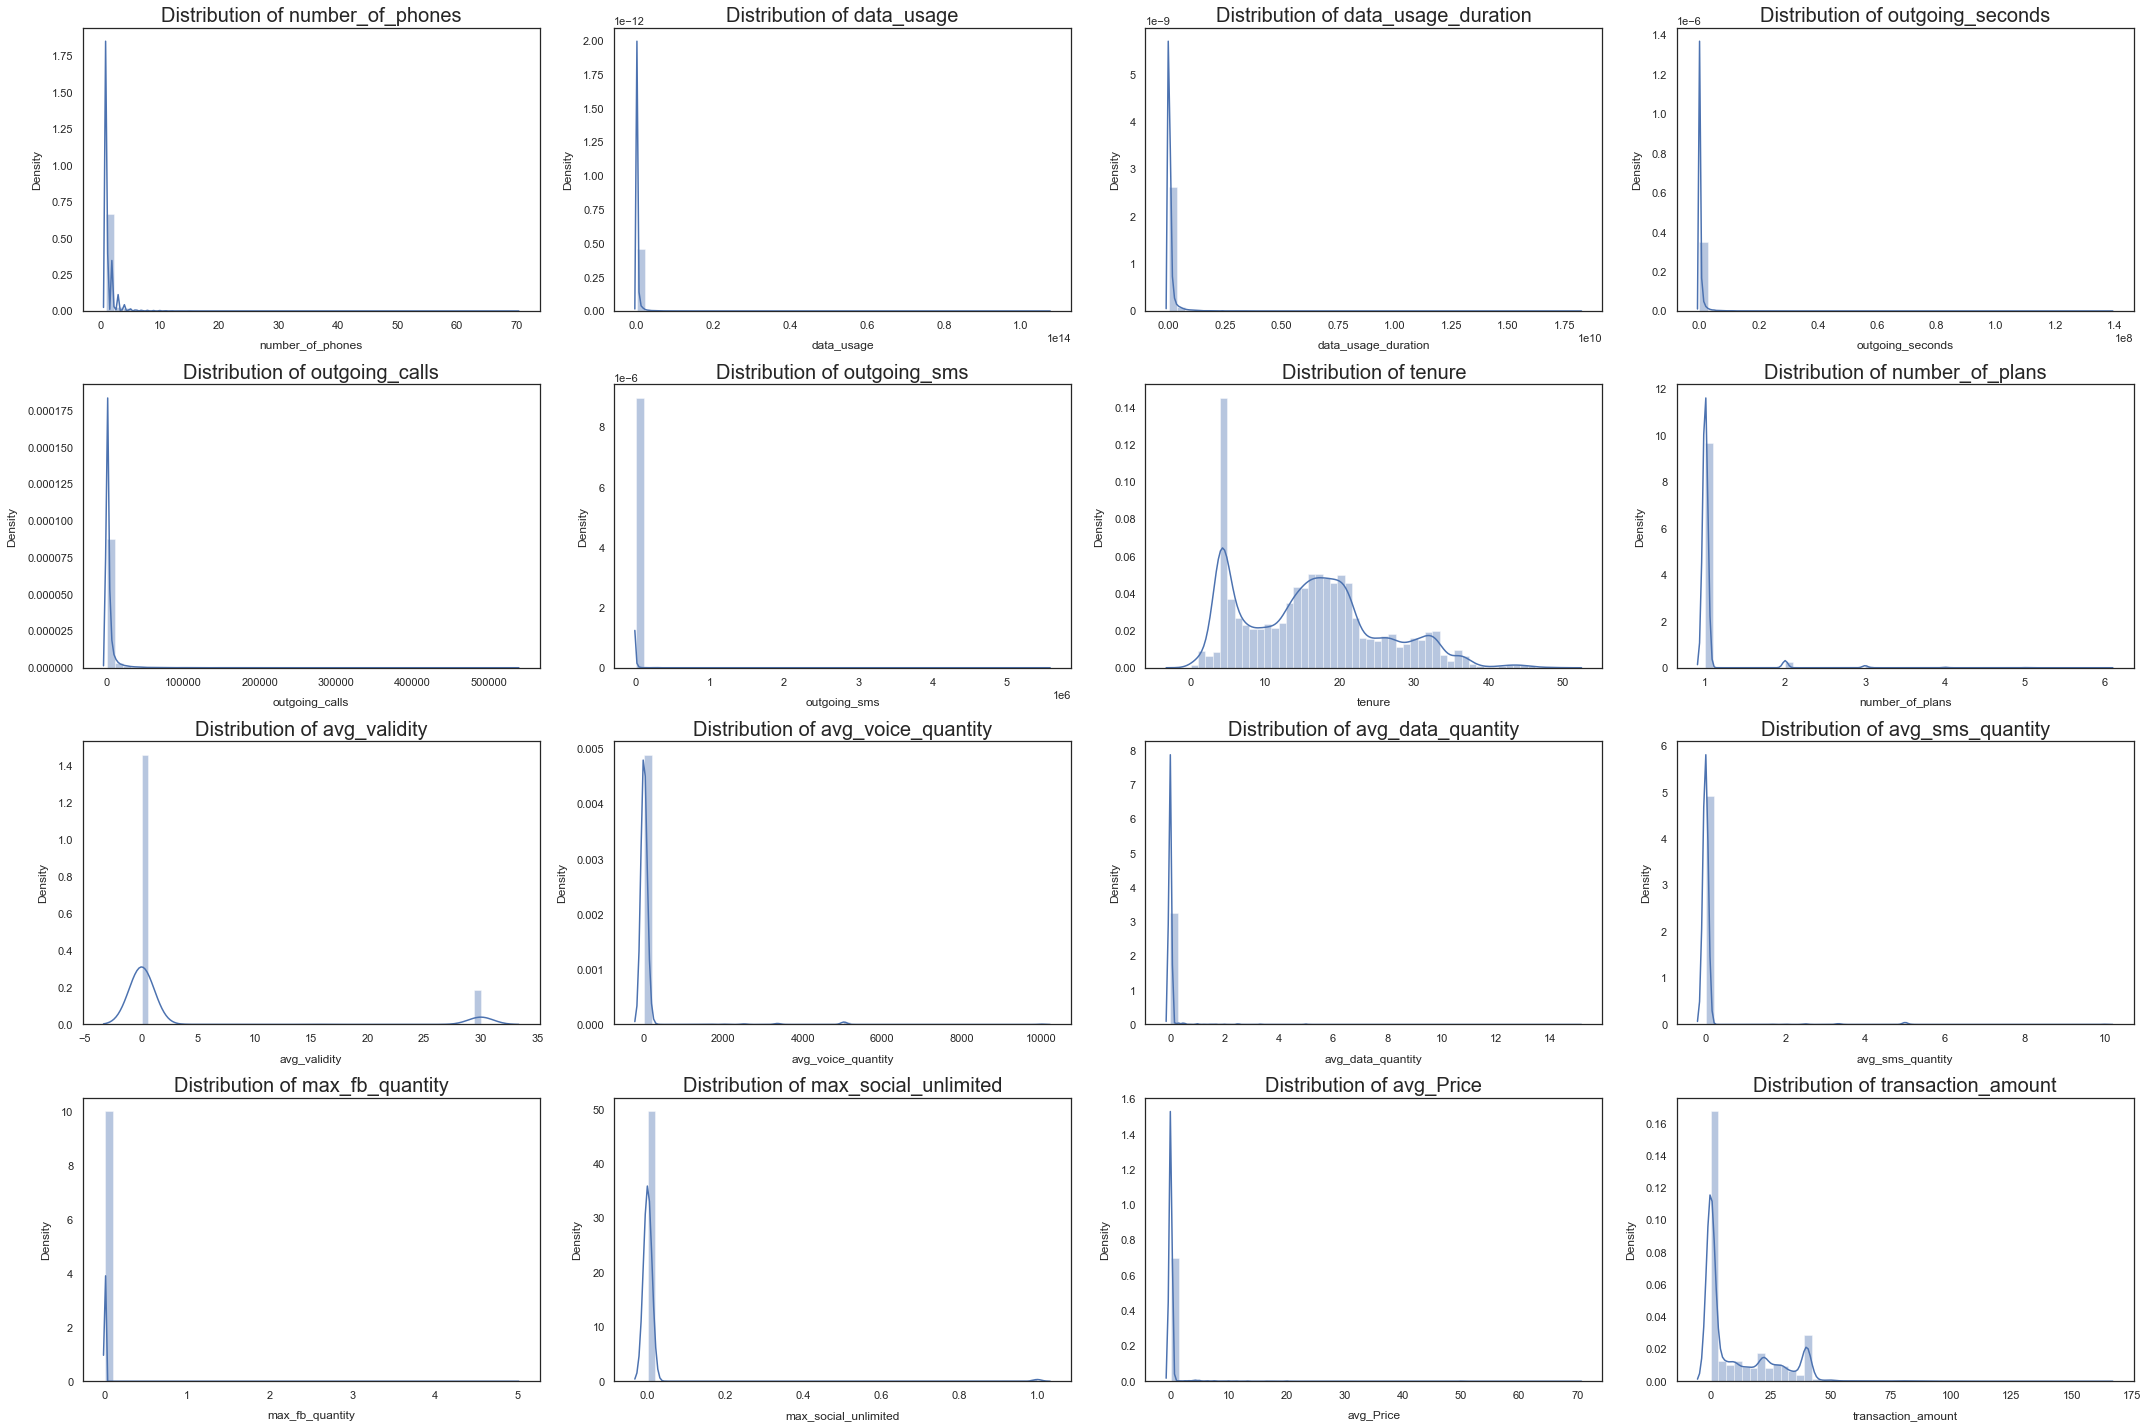

In [78]:
rcParams['axes.labelpad']= 10

plt.figure(figsize=(30, 20))

plt.subplot(4, 4, 1)
check_skew(result_df,'number_of_phones')

plt.subplot(4, 4, 2)
check_skew(result_df,'data_usage')

plt.subplot(4, 4, 3)
check_skew(result_df,'data_usage_duration')

plt.subplot(4, 4, 4)
check_skew(result_df,'outgoing_seconds')

plt.subplot(4, 4, 5)
check_skew(result_df,'outgoing_calls')

plt.subplot(4, 4, 6)
check_skew(result_df,'outgoing_sms')

plt.subplot(4, 4, 7)
check_skew(result_df,'tenure')

plt.subplot(4, 4, 8)
check_skew(result_df,'number_of_plans')

plt.subplot(4, 4, 9)
check_skew(result_df,'avg_validity')

plt.subplot(4, 4, 10)
check_skew(result_df,'avg_voice_quantity')

plt.subplot(4, 4, 11)
check_skew(result_df,'avg_data_quantity')

plt.subplot(4, 4, 12)
check_skew(result_df,'avg_sms_quantity')

plt.subplot(4, 4, 13)
check_skew(result_df,'max_fb_quantity')

plt.subplot(4, 4, 14)
check_skew(result_df,'max_social_unlimited')

plt.subplot(4, 4, 15)
check_skew(result_df,'avg_Price')

plt.subplot(4, 4, 16)
check_skew(result_df,'transaction_amount')

plt.rcParams['xtick.major.pad']=5
plt.rcParams['ytick.major.pad']=5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['axes.labelsize'] = 20
plt.tight_layout()

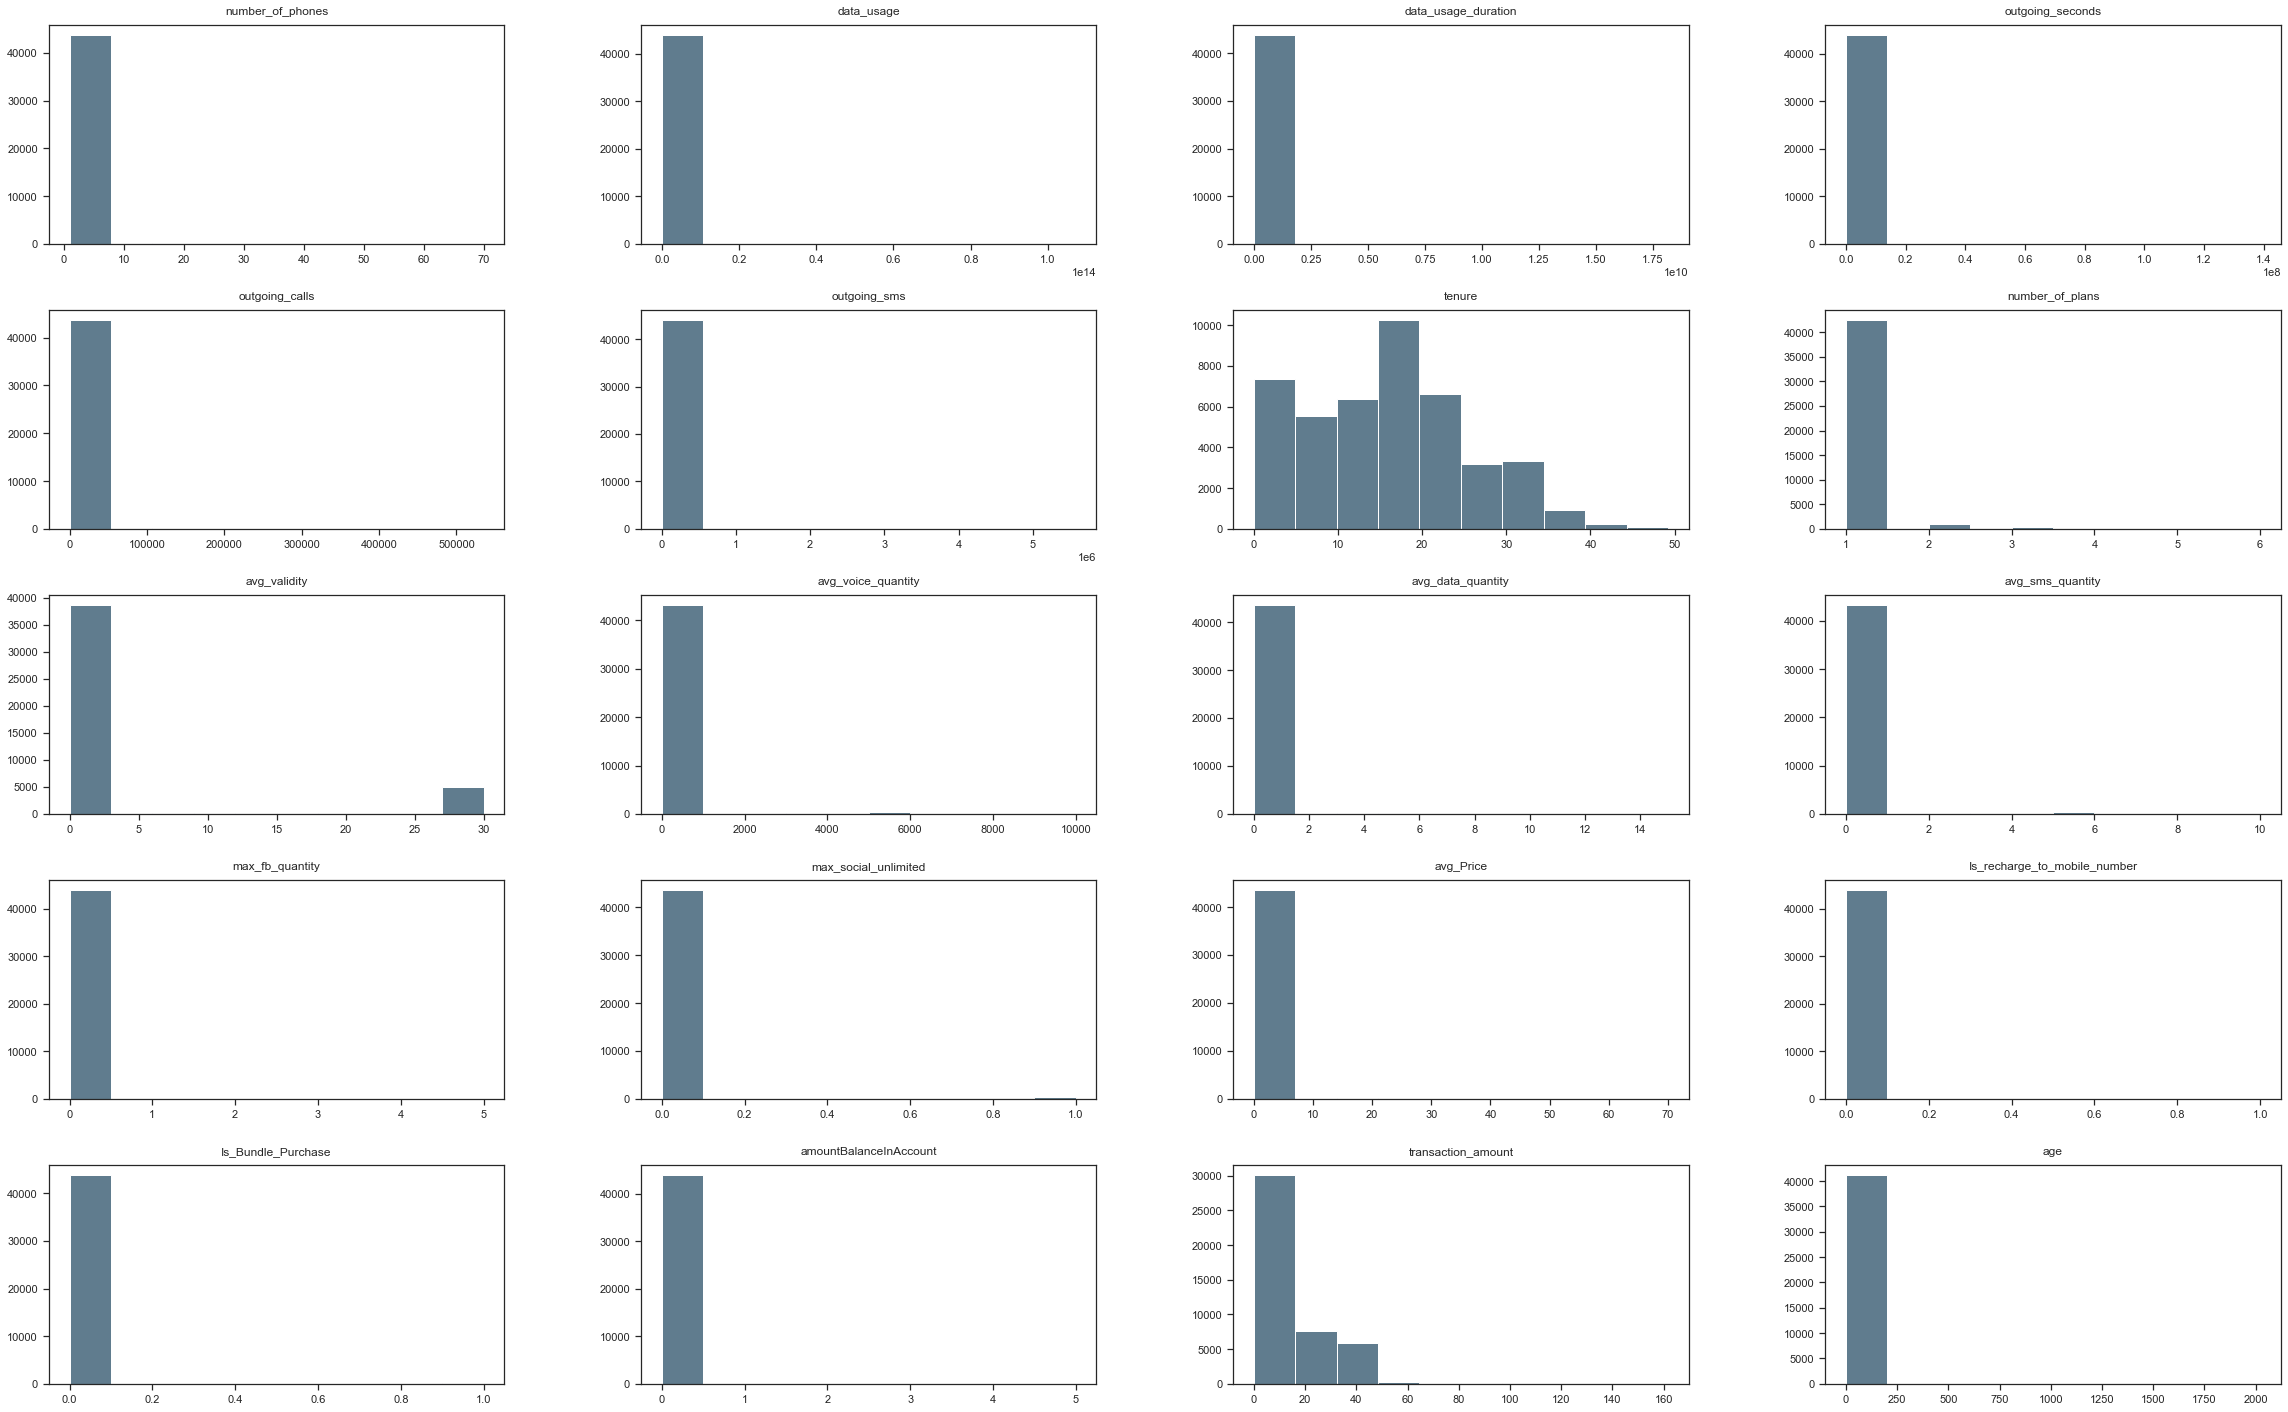

In [433]:
result_df.loc[:, result_df.columns != 'user_id'].hist(bins=10, grid=False, figsize=(40,25), color='#607c8e', zorder=2, rwidth=3);

In [83]:
by_zone = pd.pivot_table(data=result_df, index='Zone',
               values='user_id',
               aggfunc='count',
               fill_value=0).apply(lambda x: round(x*100/sum(x),2)).sort_values(by=['user_id'], ascending=False)
by_zone

,user_id
Zone,
Others,75.45
Missing,9.36
5,2.86
4,2.29
9,2.16
1,1.96
3,1.81
8,1.67
2,1.55


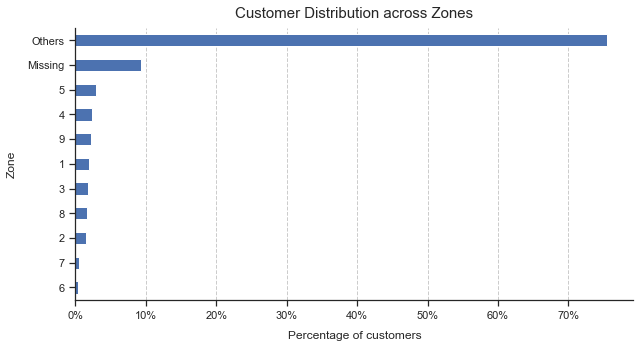

In [471]:
from matplotlib import ticker
ax = by_zone.plot(
    kind='barh',
    title='Customer Distribution across Zones',figsize=(10,5))
ax.invert_yaxis() # put destinations with more passengers on top
# formatting
ax.set(xlabel='Percentage of customers', ylabel='Zone')
ax.get_legend().remove()
ax.grid(which='major', axis='x', linestyle='--')
ax.xaxis.label.set_size(12)     # change xlabel size
ax.yaxis.label.set_size(12)     # change ylabel size
ax.title.set_size(15)           # change subplot title size
# shows x-axis in millions instead of scientific notation
ax.xaxis.set_major_formatter(ticker.PercentFormatter())
# removes the top and right lines from the figure to make it less boxy
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

In [144]:
age_df = result_df[['user_id','age','gender']]
for i, row in age_df.iterrows():
    if pd.isna(row["age"]):
        age_df.at[i,"bucket"] = "Missing"
    else:
        if row["age"] <= 20: 
            age_df.at[i,"bucket"] = "0-20"
        elif row["age"] <= 40:
            age_df.at[i,"bucket"] = "20-40"
        elif row["age"] <= 60:
            age_df.at[i,"bucket"] = "40-60"
        else:
            age_df.at[i,"bucket"] = "60+"

by_age = pd.pivot_table(data=age_df, index='bucket',columns = 'gender',
               values='user_id',
               aggfunc='count',
               fill_value=0).sort_values(by=['bucket'])
by_age

gender,Female,Male,Missing
bucket,,,
0-20,463,704,60
20-40,9251,13882,1304
40-60,4913,7665,527
60+,748,1596,105
Missing,10,6,2744


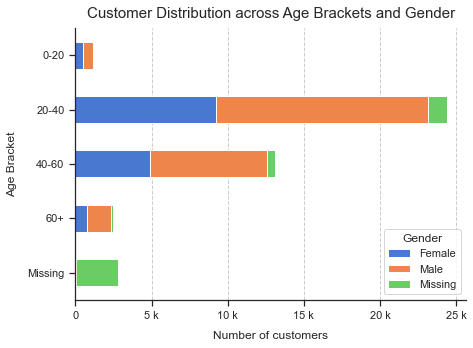

In [475]:
my_palette = sns.color_palette("muted")
ax = by_age.plot(
    kind='barh',stacked = True,
    title='Customer Distribution across Age Brackets and Gender',color=my_palette, figsize=(7,5))
ax.invert_yaxis() # put destinations with more passengers on top
# formatting
ax.set(xlabel='Number of customers', ylabel='Age Bracket')
ax.legend(title='Gender')
ax.grid(which='major', axis='x', linestyle='--')
ax.xaxis.label.set_size(12)     # change xlabel size
ax.yaxis.label.set_size(12)     # change ylabel size
ax.title.set_size(15)           # change subplot title size
# shows x-axis in millions instead of scientific notation
ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

In [253]:
data_usage_df = result_df[['data_usage','number_of_phones','tenure','user_id']]
data_usage_df['average_data_usage'] = data_usage_df['data_usage']/(data_usage_df['tenure']*data_usage_df['number_of_phones']*(1024**3))

for i, row in data_usage_df.iterrows():
    if row["tenure"] <= 12: 
        data_usage_df.at[i,"tenure_year"] = "0-1 Yr"
    elif row["tenure"] <= 24:
        data_usage_df.at[i,"tenure_year"] = "1-2 Yr"
    elif row["tenure"] <= 36:
        data_usage_df.at[i,"tenure_year"] = "2-3 Yr"
    else:
        data_usage_df.at[i,"tenure_year"] = "3-4 Yr"
        
by_tenure_data_usage = pd.pivot_table(data=data_usage_df, index='tenure_year',
                                      values=['average_data_usage','user_id'],
                                      aggfunc={'average_data_usage':'mean','user_id':'count'},
                                      fill_value=0).sort_values(by=['tenure_year'])

by_tenure_data_usage = by_tenure_data_usage.rename(columns={"average_data_usage": "Average Monthly Data Usage", "user_id": "Number Of Customers"}) 
by_tenure_data_usage

,Average Monthly Data Usage,Number Of Customers
tenure_year,,
0-1 Yr,5.374111,15015
1-2 Yr,5.027146,20729
2-3 Yr,8.798142,7302
3-4 Yr,1.537161,932


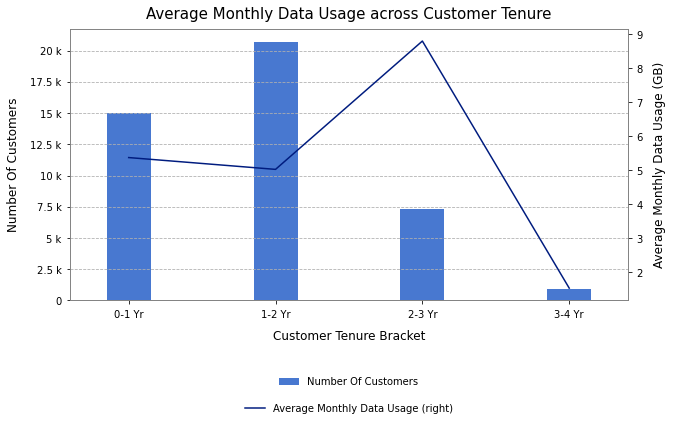

In [288]:
#rcParams['axes.titlepad'] = 10
rcParams['axes.labelpad']= 10

ax = by_tenure_data_usage[['Number Of Customers']].plot(
    kind='bar',title='Average Monthly Data Usage across Customer Tenure',color=my_palette,figsize=(10,5), width = 0.3)

ax1 = by_tenure_data_usage[['Average Monthly Data Usage']].plot(
    kind='line', secondary_y=True, ax=ax)

#ax.invert_yaxis() # put destinations with more passengers on top
# formatting
ax.set(xlabel='Customer Tenure Bracket', ylabel='Number Of Customers')
ax1.set(ylabel='Average Monthly Data Usage (GB)')
ax.tick_params(axis='both', which='major', pad=5)
ax1.tick_params(axis='both', which='major', pad=5)

#ax.get_legend().remove()
ax.grid(which='major', axis='y', linestyle='--')
ax.xaxis.label.set_size(12)     # change xlabel size
ax.yaxis.label.set_size(12)     # change ylabel size
ax1.yaxis.label.set_size(12)     # change ylabel size
ax.title.set_size(15)           # change subplot title size
# shows x-axis in millions instead of scientific notation
ax.yaxis.set_major_formatter(ticker.EngFormatter())

#change spine color
for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        
for spine in ax1.spines.values():
        spine.set_edgecolor('gray')
        
#Placing legend at bottom
ax.legend(bbox_to_anchor =(0.5,-0.35), loc='lower center', frameon=False)
ax1.legend(bbox_to_anchor =(0.5,-0.45), loc='lower center', frameon=False);
#ax.plot.tight_layout()


In [291]:
sms_count_df = result_df[['outgoing_sms','number_of_phones','tenure','user_id']]
sms_count_df['average_outgoing_sms'] = sms_count_df['outgoing_sms']/(sms_count_df['tenure']*sms_count_df['number_of_phones'])

for i, row in sms_count_df.iterrows():
    if row["tenure"] <= 12: 
        sms_count_df.at[i,"tenure_year"] = "0-1 Yr"
    elif row["tenure"] <= 24:
        sms_count_df.at[i,"tenure_year"] = "1-2 Yr"
    elif row["tenure"] <= 36:
        sms_count_df.at[i,"tenure_year"] = "2-3 Yr"
    else:
        sms_count_df.at[i,"tenure_year"] = "3-4 Yr"
        
by_tenure_outgoing_sms = pd.pivot_table(data=sms_count_df, index='tenure_year',
                                      values=['average_outgoing_sms','user_id'],
                                      aggfunc={'average_outgoing_sms':'mean','user_id':'count'},
                                      fill_value=0).sort_values(by=['tenure_year'])

by_tenure_outgoing_sms = by_tenure_outgoing_sms.rename(columns={"average_outgoing_sms": "Average Monthly Outgoing SMS", "user_id": "Number Of Customers"}) 
by_tenure_outgoing_sms

,Average Monthly Outgoing SMS,Number Of Customers
tenure_year,,
0-1 Yr,6.946591,15015
1-2 Yr,7.031576,20729
2-3 Yr,12.569591,7302
3-4 Yr,15.919645,932


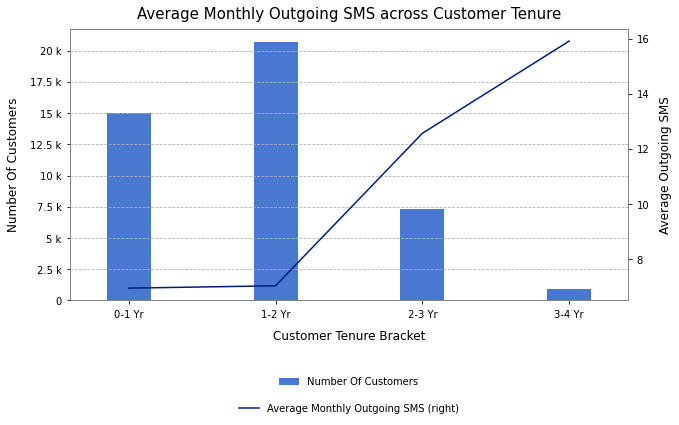

In [292]:
rcParams['axes.labelpad']= 10

ax = by_tenure_outgoing_sms[['Number Of Customers']].plot(
    kind='bar',title='Average Monthly Outgoing SMS across Customer Tenure',color=my_palette,figsize=(10,5), width = 0.3)

ax1 = by_tenure_outgoing_sms[['Average Monthly Outgoing SMS']].plot(
    kind='line', secondary_y=True, ax=ax)

#ax.invert_yaxis() # put destinations with more passengers on top
# formatting
ax.set(xlabel='Customer Tenure Bracket', ylabel='Number Of Customers')
ax1.set(ylabel='Average Outgoing SMS')
ax.tick_params(axis='both', which='major', pad=5)
ax1.tick_params(axis='both', which='major', pad=5)

#ax.get_legend().remove()
ax.grid(which='major', axis='y', linestyle='--')
ax.xaxis.label.set_size(12)     # change xlabel size
ax.yaxis.label.set_size(12)     # change ylabel size
ax1.yaxis.label.set_size(12)     # change ylabel size
ax.title.set_size(15)           # change subplot title size
# shows x-axis in millions instead of scientific notation
ax.yaxis.set_major_formatter(ticker.EngFormatter())

#change spine color
for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        
for spine in ax1.spines.values():
        spine.set_edgecolor('gray')
        
#Placing legend at bottom
ax.legend(bbox_to_anchor =(0.5,-0.35), loc='lower center', frameon=False)
ax1.legend(bbox_to_anchor =(0.5,-0.45), loc='lower center', frameon=False);
#ax.plot.tight_layout()

In [293]:
outgoing_seconds_df = result_df[['outgoing_seconds','number_of_phones','tenure','user_id']]
outgoing_seconds_df['average_outgoing_seconds'] = outgoing_seconds_df['outgoing_seconds']/(outgoing_seconds_df['tenure']*outgoing_seconds_df['number_of_phones']*(60**2))

for i, row in outgoing_seconds_df.iterrows():
    if row["tenure"] <= 12: 
        outgoing_seconds_df.at[i,"tenure_year"] = "0-1 Yr"
    elif row["tenure"] <= 24:
        outgoing_seconds_df.at[i,"tenure_year"] = "1-2 Yr"
    elif row["tenure"] <= 36:
        outgoing_seconds_df.at[i,"tenure_year"] = "2-3 Yr"
    else:
        outgoing_seconds_df.at[i,"tenure_year"] = "3-4 Yr"
        
by_tenure_outgoing_seconds = pd.pivot_table(data=outgoing_seconds_df, index='tenure_year',
                                      values=['average_outgoing_seconds','user_id'],
                                      aggfunc={'average_outgoing_seconds':'mean','user_id':'count'},
                                      fill_value=0).sort_values(by=['tenure_year'])

by_tenure_outgoing_seconds = by_tenure_outgoing_seconds.rename(columns={"average_outgoing_seconds": "Average Monthly Outgoing Voice Call Duration", "user_id": "Number Of Customers"}) 
by_tenure_outgoing_seconds

,Average Monthly Outgoing Voice Call Duration,Number Of Customers
tenure_year,,
0-1 Yr,2.5743,15015
1-2 Yr,2.767947,20729
2-3 Yr,5.692565,7302
3-4 Yr,1.706134,932


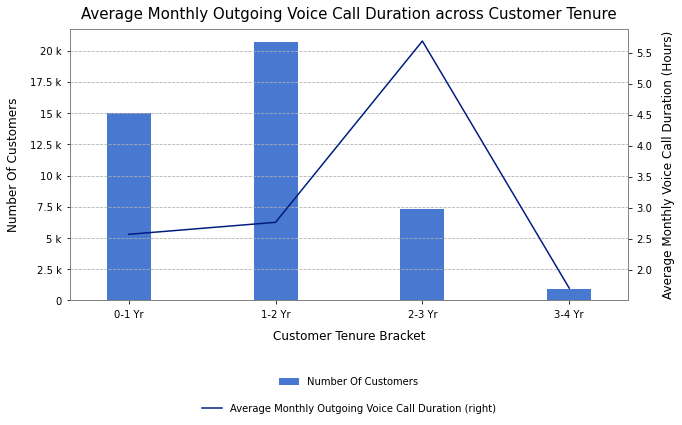

In [295]:
rcParams['axes.labelpad']= 10

ax = by_tenure_outgoing_seconds[['Number Of Customers']].plot(
    kind='bar',title='Average Monthly Outgoing Voice Call Duration across Customer Tenure',color=my_palette,figsize=(10,5), width = 0.3)

ax1 = by_tenure_outgoing_seconds[['Average Monthly Outgoing Voice Call Duration']].plot(
    kind='line', secondary_y=True, ax=ax)

#ax.invert_yaxis() # put destinations with more passengers on top
# formatting
ax.set(xlabel='Customer Tenure Bracket', ylabel='Number Of Customers')
ax1.set(ylabel='Average Monthly Voice Call Duration (Hours)')
ax.tick_params(axis='both', which='major', pad=5)
ax1.tick_params(axis='both', which='major', pad=5)

#ax.get_legend().remove()
ax.grid(which='major', axis='y', linestyle='--')
ax.xaxis.label.set_size(12)     # change xlabel size
ax.yaxis.label.set_size(12)     # change ylabel size
ax1.yaxis.label.set_size(12)     # change ylabel size
ax.title.set_size(15)           # change subplot title size
# shows x-axis in millions instead of scientific notation
ax.yaxis.set_major_formatter(ticker.EngFormatter())

#change spine color
for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        
for spine in ax1.spines.values():
        spine.set_edgecolor('gray')
        
#Placing legend at bottom
ax.legend(bbox_to_anchor =(0.5,-0.35), loc='lower center', frameon=False)
ax1.legend(bbox_to_anchor =(0.5,-0.45), loc='lower center', frameon=False);
#ax.plot.tight_layout()

In [326]:
transaction_amount_df = result_df[result_df['transaction_amount'] > 0][['transaction_amount','user_id']]
transaction_amount_df

for i, row in transaction_amount_df.iterrows():
    if row["transaction_amount"] <= 15: 
        transaction_amount_df.at[i,"transaction_bucket"] = "0-15"
    elif row["transaction_amount"] <= 30:
        transaction_amount_df.at[i,"transaction_bucket"] = "15-30"
    elif row["transaction_amount"] <= 45:
        transaction_amount_df.at[i,"transaction_bucket"] = "30-45"
#     elif row["transaction_amount"] <= 60:
#         transaction_amount_df.at[i,"transaction_bucket"] = "45-60"
#     elif row["transaction_amount"] <= 75:
#         transaction_amount_df.at[i,"transaction_bucket"] = "60-75"
#     elif row["transaction_amount"] <= 80:
#         transaction_amount_df.at[i,"transaction_bucket"] = "60-80"
    else:
        transaction_amount_df.at[i,"transaction_bucket"] = "45+"
        
by_transaction_buckets = pd.pivot_table(data=transaction_amount_df, index='transaction_bucket',
                                      values=['user_id'],
                                      aggfunc='count',
                                      fill_value=0)
by_transaction_buckets = by_transaction_buckets.rename(columns={"user_id": "Number Of Customers"}) 
by_transaction_buckets

,Number Of Customers
transaction_bucket,
0-15,6311
15-30,7474
30-45,6361
45+,492


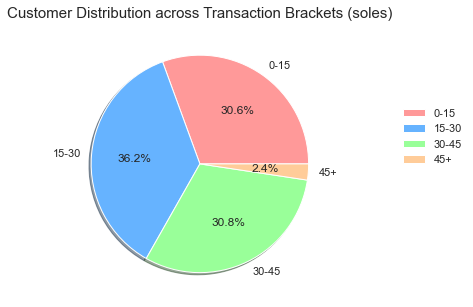

In [482]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = by_transaction_buckets.plot(
    kind='pie', y='Number Of Customers',
    title='Customer Distribution across Transaction Brackets (soles)',figsize=(20,5), autopct='%1.1f%%',shadow=True,colors=colors)

ax.set_ylabel('')
ax.legend(title='Transaction Amount Brackets (soles)')
ax.legend(bbox_to_anchor = (1.5, 0.6), loc='center right', frameon=False)
ax.title.set_size(15)# change subplot title size

## Clustering

In [12]:
clustering_cols = ['user_id','tenure','data_usage','data_usage_duration','outgoing_seconds','outgoing_calls',
                   'outgoing_sms','number_of_phones','transaction_amount','number_of_plans','avg_validity',
                   'avg_voice_quantity','avg_data_quantity','avg_sms_quantity','max_fb_quantity','social_unlimited',
                   'avg_Price'
                  ]


result_df1 = result_df[clustering_cols]
result_df1 = result_df1.set_index('user_id')
result_df1

,tenure,data_usage,data_usage_duration,outgoing_seconds,outgoing_calls,outgoing_sms,number_of_phones
user_id,,,,,,,
40867,4.43,30548202468,7299706,164547,1229,4,1
26140,15.87,35017521,10347343,0,1,8,1
41338,4.70,5695992628,2364368,34410,630,12,2
37778,13.13,279313238362,50914994,126590,2508,17,1
45986,7.17,11588,956,65104,710,7,1
...,...,...,...,...,...,...,...
39333,4.07,3913733155,4278265,8221,123,4,1
56892,4.07,1826183007,2745312,46,3,4,1
58705,4.07,25546788770,4126177,1053,36,4,1


In [13]:
result_df1['average_data_usage'] = result_df1['data_usage']/(result_df1['tenure']*result_df1['number_of_phones'])
result_df1['average_data_usage_duration'] = result_df1['data_usage_duration']/(result_df1['tenure']*result_df1['number_of_phones'])
result_df1['average_outgoing_seconds'] = result_df1['outgoing_seconds']/(result_df1['tenure']*result_df1['number_of_phones'])
result_df1['average_outgoing_calls'] = result_df1['outgoing_calls']/(result_df1['tenure']*result_df1['number_of_phones'])
result_df1['average_outgoing_sms'] = result_df1['outgoing_sms']/(result_df1['tenure']*result_df1['number_of_phones'])
result_df1['average_transaction_amount'] = result_df1['transaction_amount']/(result_df1['tenure']*result_df1['number_of_phones'])

result_df1 = result_df1.drop(columns=['tenure','data_usage','data_usage_duration','outgoing_seconds','outgoing_calls',
                   'outgoing_sms','number_of_phones','transaction_amount'])

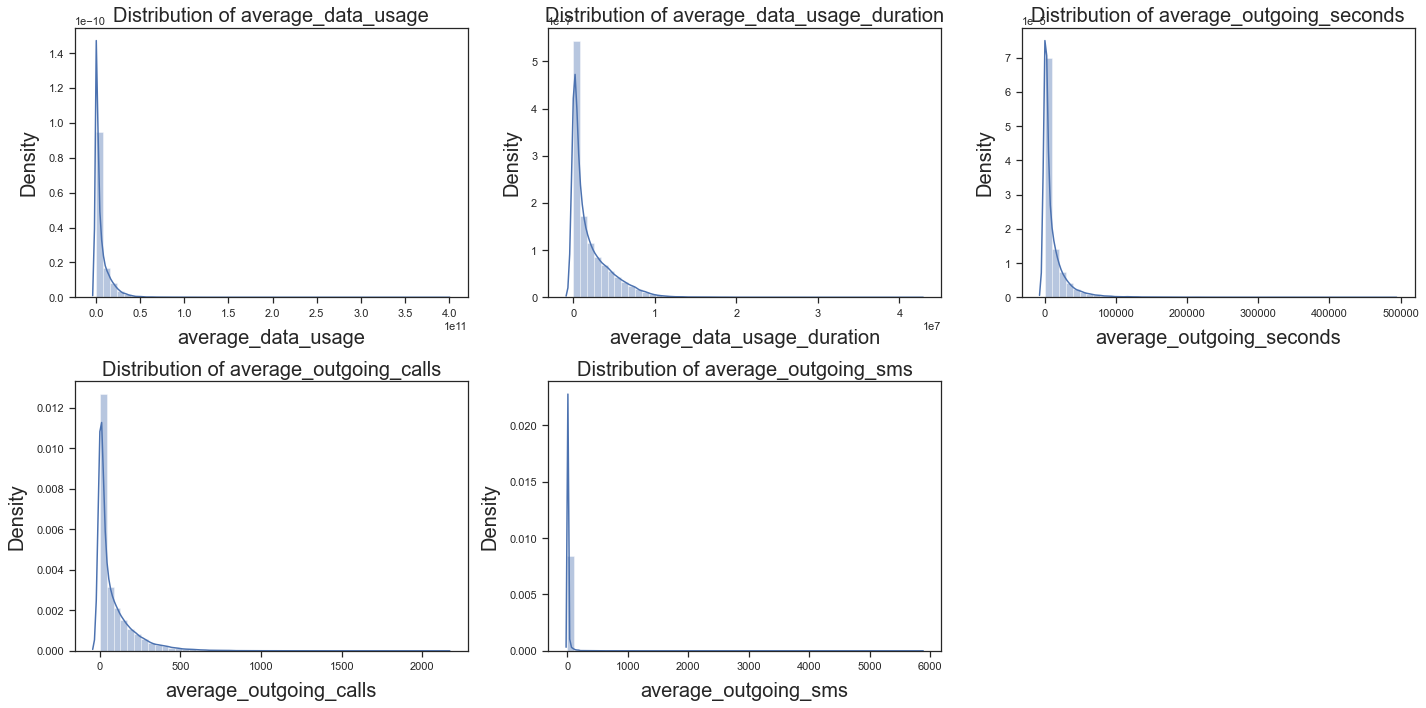

In [81]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
check_skew(result_df1,'average_data_usage')

plt.subplot(2, 3, 2)
check_skew(result_df1,'average_data_usage_duration')

plt.subplot(2, 3, 3)
check_skew(result_df1,'average_outgoing_seconds')

plt.subplot(2, 3, 4)
check_skew(result_df1,'average_outgoing_calls')

plt.subplot(2, 3, 5)
check_skew(result_df1,'average_outgoing_sms')

plt.tight_layout()

# Normalization

In [14]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
scaled_data = qt.fit_transform(result_df1)
scaled_data = scaled_data - scaled_data.mean()

scaled_data_df = pd.DataFrame(scaled_data, columns = ['average_data_usage','average_data_usage_duration','average_outgoing_seconds',
                                    'average_outgoing_calls','average_outgoing_sms'])

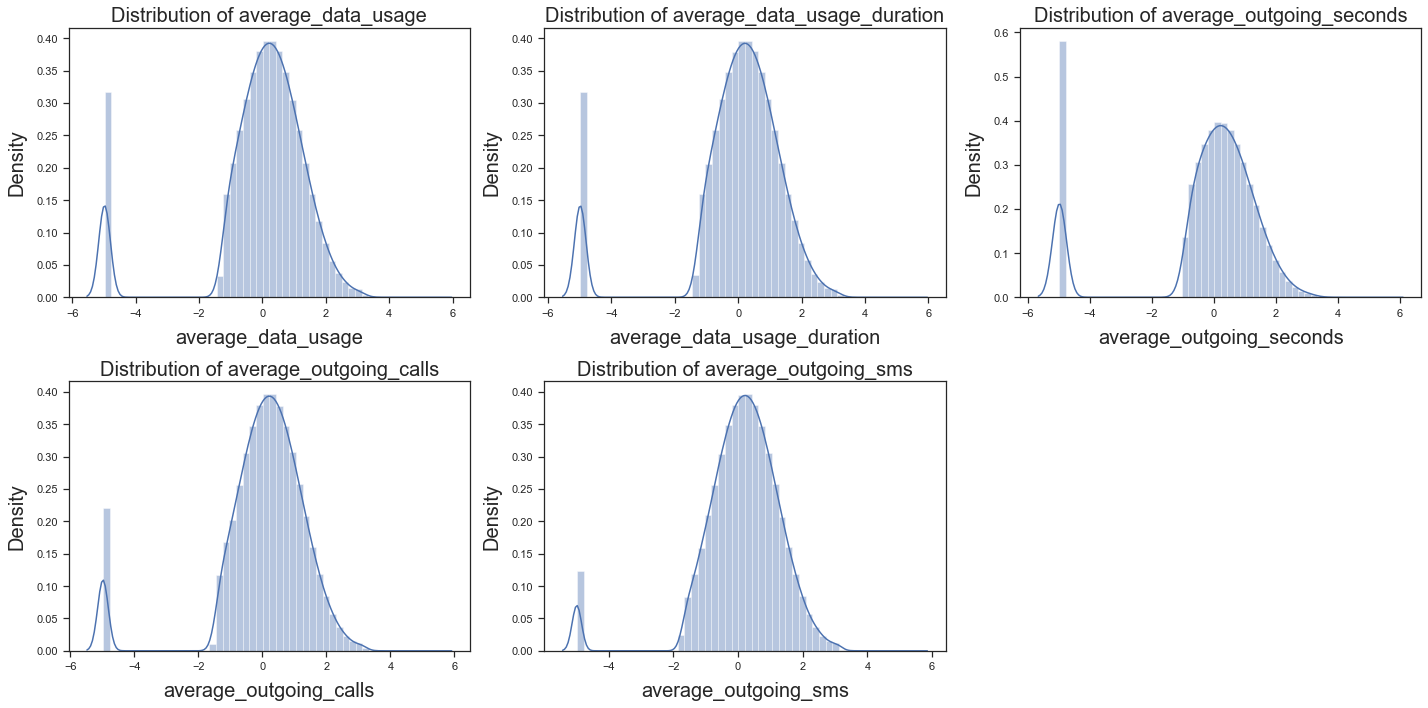

In [83]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
check_skew(scaled_data_df,'average_data_usage')

plt.subplot(2, 3, 2)
check_skew(scaled_data_df,'average_data_usage_duration')

plt.subplot(2, 3, 3)
check_skew(scaled_data_df,'average_outgoing_seconds')

plt.subplot(2, 3, 4)
check_skew(scaled_data_df,'average_outgoing_calls')

plt.subplot(2, 3, 5)
check_skew(scaled_data_df,'average_outgoing_sms')

plt.tight_layout()

# K-Means

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [16]:
def find_best_clusters(data, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(data)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers , k_values

In [17]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

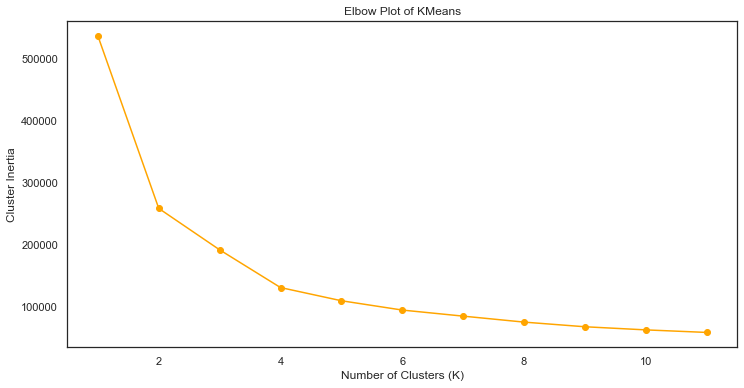

In [18]:
clusters_centers,k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

In [19]:
#clustering on best number of clusters
kmeans_model = KMeans(n_clusters = 5,random_state=42,init = 'k-means++')

kmeans_model.fit(scaled_data)

KMeans(n_clusters=5, random_state=42)

In [44]:
#fixing cluster labels
idx = np.argsort(-1*kmeans_model.cluster_centers_.sum(axis=1))[:5]
lut = np.zeros_like(idx)
lut[idx] = np.arange(5)

For n_clusters = 5 The average silhouette_score is : 0.40507289114741896


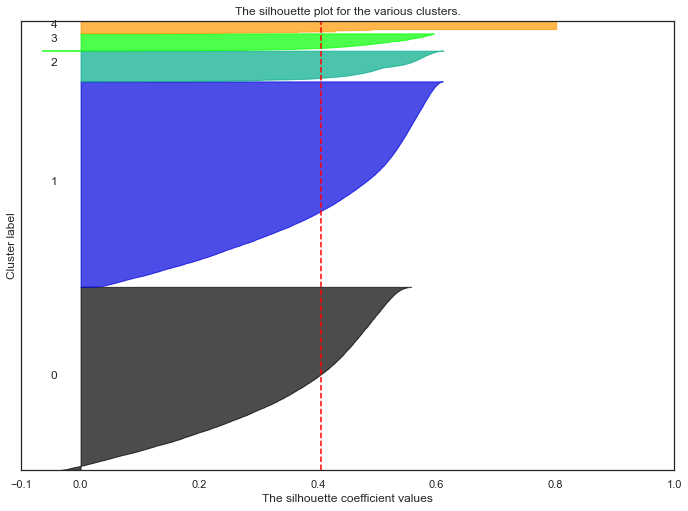

In [46]:
#cluster_labels = kmeans_model.fit_predict(scaled_data)
range_n_clusters = [5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots()
    fig.set_size_inches(11.7,8.27)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #clusterer = kmeans_model
    cluster_labels = lut[kmeans_model.labels_]
    #clusterer = kmeans_model
    #cluster_labels = clusterer.fit_predict(scaled_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

<AxesSubplot:>

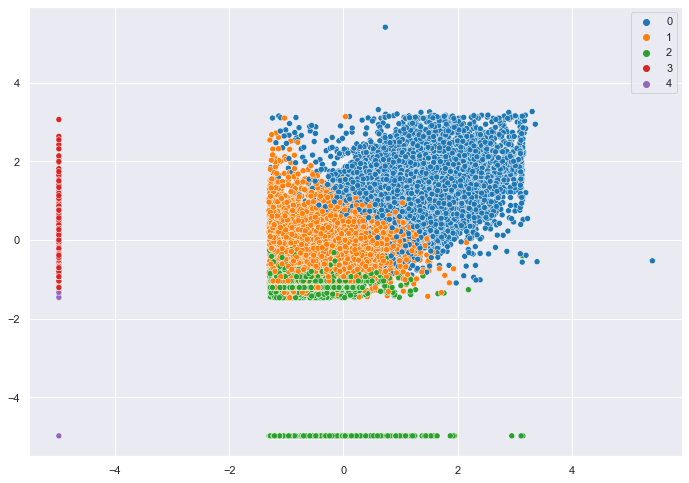

In [47]:
cluster_labels_kmeans = cluster_labels
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("tab10", 5)
sns.scatterplot(scaled_data[:,1], scaled_data[:,3], hue=cluster_labels, legend='full', palette = palette)

In [39]:
print("Silhouette Coefficient for KMEANS: %0.3f" % metrics.silhouette_score(scaled_data, kmeans_model.labels_))
print("Davies-Bouldin Score for KMEANS: %0.3f" % metrics.davies_bouldin_score(scaled_data, kmeans_model.labels_))
print("Calinski-Harabasz Score for KMEANS: %0.3f" % metrics.calinski_harabasz_score(scaled_data, kmeans_model.labels_))

Silhouette Coefficient for KMEANS: 0.405
Davies-Bouldin Score for KMEANS: 0.843
Calinski-Harabasz Score for KMEANS: 42709.319


# Gaussian Mixed Model

In [16]:
from sklearn.mixture import BayesianGaussianMixture as BGM
from sklearn.mixture import GaussianMixture as GMM

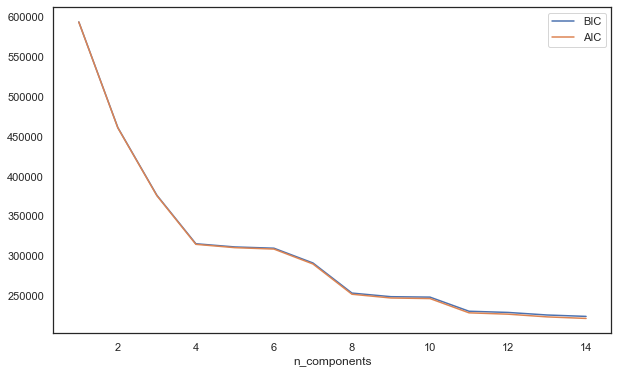

In [21]:
n_components = np.arange(1, 15)
models = [GMM(n, covariance_type='full', random_state=19).fit(scaled_data)
          for n in n_components]

plt.figure(figsize=(10,6))
plt.plot(n_components, [m.bic(scaled_data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(scaled_data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [26]:
gmm = GMM(n_components=6, random_state=19, covariance_type='full', n_init = 20)
gmm.fit(scaled_data)

GaussianMixture(n_components=6, n_init=20, random_state=19)

For n_clusters = 6 The average silhouette_score is : 0.33677824774732434


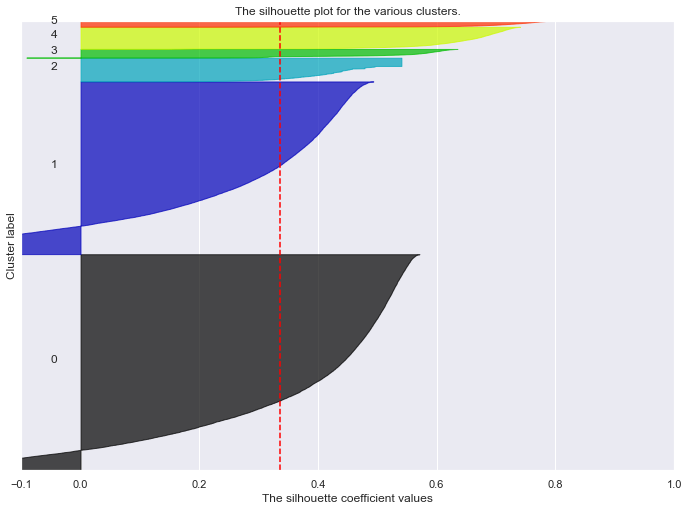

In [41]:
range_n_clusters = [6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots()
    fig.set_size_inches(11.7,8.27)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = gmm
    cluster_labels = clusterer.fit_predict(scaled_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [43]:
cluster_labels_gmm = gmm.fit_predict(scaled_data)
print("Silhouette Coefficient for GMM: %0.3f" % metrics.silhouette_score(scaled_data, cluster_labels_gmm))
print("Davies-Bouldin Score for GMM: %0.3f" % metrics.davies_bouldin_score(scaled_data, cluster_labels_gmm))
print("Calinski-Harabasz Score for GMM: %0.3f" % metrics.calinski_harabasz_score(scaled_data, cluster_labels_gmm))

Silhouette Coefficient for GMM: 0.337
Davies-Bouldin Score for GMM: 0.866
Calinski-Harabasz Score for GMM: 30692.617


<AxesSubplot:>

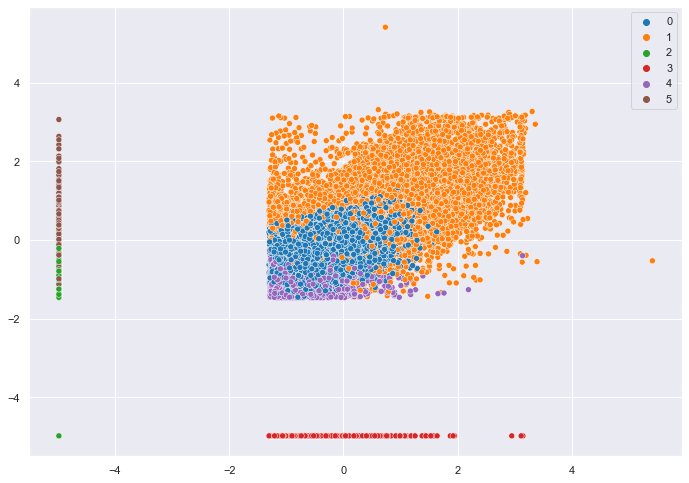

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("tab10", 6)
sns.scatterplot(scaled_data[:,1], scaled_data[:,3], hue=cluster_labels_gmm, legend='full', palette = palette)

# DBSCAN

In [45]:
from sklearn.cluster import DBSCAN

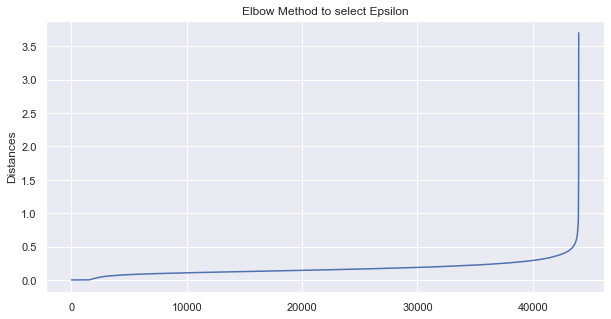

In [61]:
from sklearn.neighbors import NearestNeighbors
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=29).fit(scaled_data)
distances, idx = nn.kneighbors(scaled_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.ylabel("Distances")
plt.title("Elbow Method to select Epsilon")
plt.show()

In [47]:
#fitting DB-Scan to data 
dbscan = DBSCAN(min_samples=30, eps = 0.5).fit(scaled_data)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
db_labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise_ = list(db_labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 8
Estimated number of noise points: 3203


For n_clusters = 8 The average silhouette_score is : 0.44543382307757895


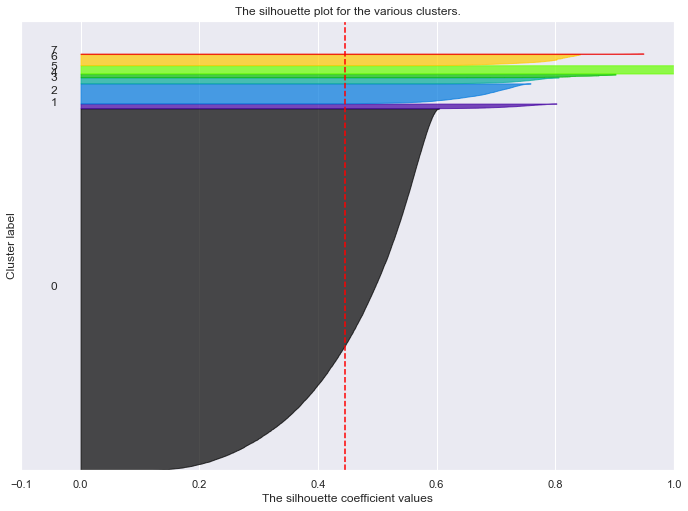

In [51]:
range_n_clusters = [8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots()
    fig.set_size_inches(11.7,8.27)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = dbscan
    cluster_labels = clusterer.fit_predict(scaled_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [400]:
print("Silhouette Coefficient for DBSCAN: %0.3f" % metrics.silhouette_score(scaled_data, cluster_labels ))
print("Davies-Bouldin Score for DBSCAN: %0.3f" % metrics.davies_bouldin_score(scaled_data, cluster_labels ))
print("Calinski-Harabasz Score for DBSCAN: %0.3f" % metrics.calinski_harabasz_score(scaled_data, cluster_labels ))

Silhouette Coefficient for DBSCAN: 0.445
Davies-Bouldin Score for DBSCAN: 2.861
Calinski-Harabasz Score for DBSCAN: 10708.179


<AxesSubplot:>

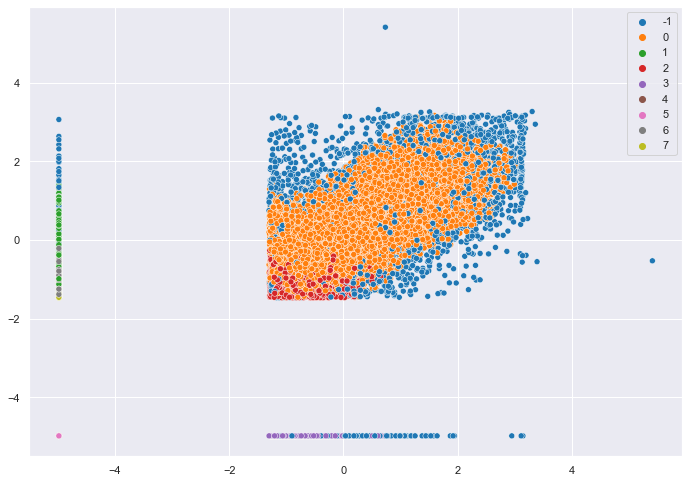

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("tab10", 9)
sns.scatterplot(scaled_data[:,1], scaled_data[:,3], hue=cluster_labels, legend='full', palette = palette)

# Writing result to GCP BigQuery

This code was taken as reference from https://github.com/vigneshSs-07/Cloud-AI-Analytics/blob/main/BigQuery/bigquery.py

In [48]:
result_df1["KMeans_clusters"] = cluster_labels_kmeans

In [60]:
user_cluster_mapping = result_df1["KMeans_clusters"]

#adds user_id to dataframe
user_cluster_mapping = user_cluster_mapping.to_frame().reset_index()
#insert_rows = list(zip(*map(user_cluster_mapping.get, user_cluster_mapping)))
user_cluster_mapping = user_cluster_mapping.rename(columns={'KMeans_clusters': 'Cluster_Id'})

In [61]:
user_cluster_mapping.value_counts("Cluster_Id")

Cluster_Id
1    20115
0    17963
2     3000
3     1685
4     1215
dtype: int64

In [48]:
#Function to create a dataset in Bigquery
def bq_create_dataset(client, dataset):
    dataset_ref = bigquery_client.dataset(dataset)

    try:
        dataset = bigquery_client.get_dataset(dataset_ref)
        print('Dataset {} already exists.'.format(dataset))
    except NotFound:
        dataset = bigquery.Dataset(dataset_ref)
        dataset.location = 'US'
        dataset = bigquery_client.create_dataset(dataset)
        print('Dataset {} created.'.format(dataset.dataset_id))
    return dataset

In [49]:
#Function to create a dataset in Table
def bq_create_table(client, dataset, table_name):
    dataset_ref = bigquery_client.dataset(dataset)

    # Prepares a reference to the table
    table_ref = dataset_ref.table(table_name)

    try:
        table =  bigquery_client.get_table(table_ref)
        print('table {} already exists.'.format(table))
    except NotFound:
        schema = [
            bigquery.SchemaField('User_Id', 'INTEGER'),
            bigquery.SchemaField('Cluster_Id', 'INTEGER'),
        ]
        table = bigquery.Table(table_ref, schema=schema)
        table = bigquery_client.create_table(table)
        print('table {} created.'.format(table.table_id))
    return table

In [50]:
#Function to export data into table in Bigquery
def export_items_to_bigquery(client, dataset, table):    

    # Prepares a reference to the dataset
    dataset_ref = bigquery_client.dataset(dataset)

    table_ref = dataset_ref.table(table)
    table = bigquery_client.get_table(table_ref)  # API call

#     rows_to_insert = insert_rows
    #errors = bigquery_client.insert_rows(table, insert_rows)  # API request
    errors = bigquery_client.load_table_from_dataframe(user_cluster_mapping, table)
    #assert errors == []

In [54]:
if __name__ == "__main__":
    #creating bigquery object
    bigquery_client = bigquery.Client()
    dataset = "ucl_dissertation_dataset"
    table_name = "user_cluster_mapping"
    data = bq_create_dataset(bigquery_client, dataset)
    table = bq_create_table(bigquery_client, dataset, table_name)
    export_items_to_bigquery(bigquery_client, dataset, table_name) #it should not be assigned, since this method is not returning anything

Dataset Dataset(DatasetReference('ucl-dissertation-project', 'ucl_dissertation_dataset')) already exists.
table user_cluster_mapping created.


In [26]:
user_cluster_mapping

,index,KMeans_clusters
0,0,0
1,1,0
2,2,0
3,3,0
4,4,4
...,...,...
43973,43979,3
43974,43980,3
43975,43981,0
43976,43982,0
